In [1]:
import datetime as dt
from datetime import date, timedelta
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style
#from lmfit.models import LorentzianModel
#from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.optimize import curve_fit

In [2]:
end = dt.datetime.today()
#print(end)
start = end - timedelta(weeks=44)
#print(start)

In [20]:
df = web.DataReader('cost', 'yahoo', start, end)
#print(df.tail())
df['date'] = df.index
df['x'] = np.arange(len(df))
#print(df)

In [21]:
def pred(t,c0,c1):
    return c0+c1*t

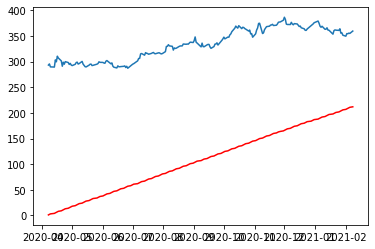

In [22]:
g = [1,1]
n = len(df['x'])
y = np.empty(n)
for i in range(n):
    y[i]=pred(df['x'][i],g[0],g[1])
plt.plot(df['date'],y,'r')
plt.plot(df['date'],df['Adj Close'])

In [23]:
t = df['x'].values
price = df['Adj Close'].values
c,cov = curve_fit(pred,t,price,g)
print(c)

[285.58811154   0.45708799]


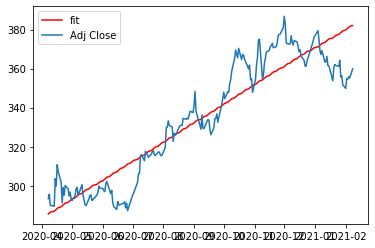

In [39]:
n = len(df['x'])
y = np.empty(n)
for i in range(n):
    y[i]=pred(df['x'][i],c[0],c[1])
plt.plot(df['date'],y,'r',label='fit')
plt.plot(df['date'],df['Adj Close'],label='Adj Close')
plt.legend()
plt.show()

In [25]:
y2 = np.empty(30)
for i in range(30):
    y2[i] = pred(df['x'].iloc[-1]+i,c[0],c[1])
print(y2[-1])

395.28922987306703


In [26]:
#values closer to 1 are a better fit than those closer to 0
from sklearn.metrics import r2_score
print('R^2: ', r2_score(y,price))

R^2:  0.8266915802171202
